# Примеры распределений по росту

Данные взяты отсюда https://people.sc.fsu.edu/~jburkardt/data/csv/hw_25000.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline

In [2]:
data = pd.read_csv('datasets/hw_25000.csv', names=['index', 'height_inches', 'weight_pounds'], header = 0)

In [3]:
data.head()

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
# Переводим высоту в сантиметры

data['height'] = data['height_inches'] * 2.54
data.head()

,index,height_inches,weight_pounds,height
0,1,65.78331,112.9925,167.089607
1,2,71.51521,136.4873,181.648633
2,3,69.39874,153.0269,176.272800
3,4,68.21660,142.3354,173.270164
4,5,67.78781,144.2971,172.181037


In [6]:
len(data)

25000

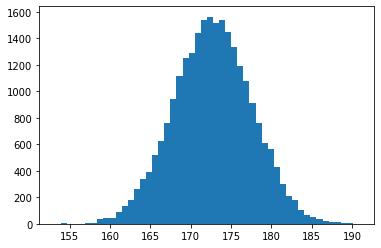

In [10]:
plt.hist(data['height'], bins = 50)
plt.show()

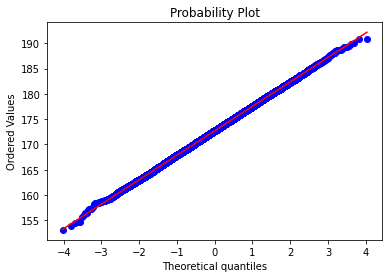

In [11]:
# Проверим "нормальность" нашего распределения с помощью QQ-plot

stats.probplot(data['height'], dist='norm', plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

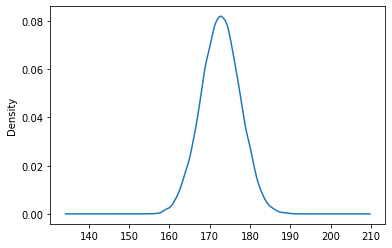

In [12]:
data['height'].plot.density()

### Стандартизация (z - преобразование)

In [13]:
np.mean(data['height']), np.std(data['height'])

(172.702508535872, 4.830167472614602)

In [14]:
z_height =  stats.mstats.zscore(data['height'])

In [15]:
np.mean(z_height), np.std(z_height)

(6.814104835939361e-16, 0.9999999999999998)

In [16]:
custom_height = 185

In [17]:
z_score = (custom_height - np.mean(data['height'])) / np.std(data['height'])
z_score

2.5459762076264587

In [19]:
1 - stats.norm.cdf(z_score)

0.005448630770914842

In [20]:
# Доверительный интервал для заданного уровня значимости

stats.norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [21]:
stats.norm.interval(.99)

(-2.5758293035489004, 2.5758293035489004)

### Доверительный интервал

In [22]:
sample = data.head(100)

In [25]:
se = np.std(sample['height'] / np.sqrt(len(sample['height'])))
se

0.4619620983721933

In [26]:
confidence_coef = stats.norm.interval(.95)[1]

In [27]:
(np.mean(sample['height']) - confidence_coef * se, np.mean(sample['height']) + confidence_coef * se)

(172.172854688968, 173.9837128390321)